In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np

Mounted at /content/gdrive


In [2]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/STBI/Dataset 1/metadata.csv')
dataset1[:2]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
dataset1=dataset1.head(100000)

In [4]:
dataset1.shape

(100000, 19)

In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          100000 non-null  object 
 1   sha               25112 non-null   object 
 2   source_x          100000 non-null  object 
 3   title             99838 non-null   object 
 4   doi               100000 non-null  object 
 5   pmcid             35948 non-null   object 
 6   pubmed_id         78393 non-null   object 
 7   license           100000 non-null  object 
 8   abstract          71643 non-null   object 
 9   publish_time      100000 non-null  object 
 10  authors           94135 non-null   object 
 11  journal           97720 non-null   object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  0 non-null       object 
 14  arxiv_id          0 non-null       object 
 15  pdf_json_files    25112 non-null   object 
 16  pmc_json_files    212

In [6]:
dataset1.drop(['sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id', 'cord_uid', 'publish_time', 'authors',  'journal'], inplace = True, axis = 1)
dataset1[:2]

,title,abstract
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...


In [7]:
dataset1.isna().sum()

title         162
abstract    28357
dtype: int64

In [8]:
dataset1[dataset1.title.isnull()]

,title,abstract
36426,NaN,NaN
37362,NaN,NaN
37999,NaN,Il existe très peu de données directes sur l’a...
38077,NaN,The risk of transmission of COVID-19 or other ...
39082,NaN,NaN
...,...,...
97392,NaN,NaN
97776,NaN,NaN
97922,NaN,NaN
98348,NaN,NaN


In [9]:
dataset1[dataset1.abstract.isnull()]

,title,abstract
14,The site of origin of the 1918 influenza pande...,NaN
51,Scientific Abstracts,NaN
52,Society of General Internal Medicine: 28th Ann...,NaN
53,CLINICAL VIGNETTES,NaN
54,CLINICAL VIGNETTES,NaN
...,...,...
99972,Pursuing a Good Death in the Time of COVID-19.,NaN
99974,Annals for Hospitalists Inpatient Notes - Clin...,NaN
99978,Coronavirus disease 2019 outbreak.,NaN
99980,"Improved sensitivity from pooled urine, pharyn...",NaN


In [10]:
dataset1.dropna(inplace = True)

In [11]:
dataset1[dataset1.title.isnull()]

,title,abstract


In [12]:
dataset1[dataset1.abstract.isnull()]

,title,abstract


In [13]:
duplicated_data = dataset1[dataset1.duplicated()]
print("Jumlah duplicated data: ", len(duplicated_data))

Jumlah duplicated data:  176


In [14]:
duplicated_data

,title,abstract
5400,Viral lower urinary tract infections,Lower urinary tract infections (UTIs) are comm...
6663,Akutes Leberversagen,"Acute liver failure (ALF) is a rare, but life-..."
6905,Parasites of the small intestine,This paper discusses the most important parasi...
7547,Management in Ausnahmesituationen: Taktisches ...,Im öffentlichen Gesundheitsdienst und vor alle...
7939,The Preparation of Chicken Tracheal Organ Cult...,"Chicken tracheal organ cultures (TOCs), compri..."
...,...,...
98608,Improving Hepatitis B Virus Vaccination Respon...,Prevention of hepatitis B (HBV) infection is p...
98663,Modeling the effects of intervention strategie...,"OBJECTIVES To model the effects of continuous,..."
98690,Effective immunity and second waves: a dynamic...,This technical report addresses a pressing iss...
99102,Introduction to Modern Climate Change. Andrew ...,Climate change is the variability of the clima...


In [15]:
dataset1 = dataset1.drop_duplicates(subset='title', keep="last")
duplicated_data = dataset1[dataset1.duplicated()]
print("Jumlah duplicated data: ", len(duplicated_data))

Jumlah duplicated data:  0


In [16]:
dataset1 = dataset1.reset_index(drop=True)
dataset1

,title,abstract
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...
...,...,...
71045,Use of in situ simulation to evaluate the oper...,"On 30 January 2020, the World Health Organizat..."
71046,Pre-hospital i-gel blind intubation for trauma...,OBJECTIVE This study aimed to evaluate the eff...
71047,The benefit of culture-independent methods to ...,AIM To identify dominant microorganisms in roo...
71048,[The way to reduce the false negative results ...,核酸检测是新型冠状病毒肺炎确诊的重要手段，但是目前临床上反映存在较高比例核酸检测假阴性的问题...


In [17]:
dataset1['abstract'].head()

0    OBJECTIVE: This retrospective chart review des...
1    Inflammatory diseases of the respiratory tract...
2    Surfactant protein-D (SP-D) participates in th...
3    Endothelin-1 (ET-1) is a 21 amino acid peptide...
4    Respiratory syncytial virus (RSV) and pneumoni...
Name: abstract, dtype: object

In [18]:
dataset1.title[10]

'Conservation of polyamine regulation by translational frameshifting from yeast to mammals'

**Preprocessing**

In [19]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# get stopword
stop_words = stopwords.words('english')

#remove stopword pada list token
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

# import Sastrawi package
from nltk.stem import SnowballStemmer

# create stemmer
stemmer = SnowballStemmer('english')

# stemmed
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
#remove number
dataset1['abstract'] = dataset1['abstract'].str.replace('\d+', '')

#remove punctuation
dataset1['abstract'] = dataset1['abstract'].str.replace(r'[^!?\w\s]+', '')

#case folding
dataset1['abstract'] = dataset1['abstract'].str.lower()

#remove stopword
dataset1['abstract'] = dataset1['abstract'] .apply(remove_stopwords)

#stemming
#dataset1['abstract'] = dataset1['abstract'].apply(stemm_text)

dataset1['abstract'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0    objective retrospective chart review describes...
1    inflammatory diseases respiratory tract common...
2    surfactant proteind spd participates innate re...
3    endothelin et  amino acid peptide diverse biol...
4    respiratory syncytial virus rsv pneumonia viru...
Name: abstract, dtype: object

In [21]:
dataset1['abstract_len'] = dataset1['abstract'].apply(lambda x: len(x.split(' ')))
dataset1

,title,abstract,abstract_len
0,Clinical features of culture-proven Mycoplasma...,objective retrospective chart review describes...,165
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases respiratory tract common...,79
2,Surfactant protein-D and pulmonary host defense,surfactant proteind spd participates innate re...,137
3,Role of endothelin-1 in lung disease,endothelin et amino acid peptide diverse biol...,41
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus rsv pneumonia viru...,74
...,...,...,...
71045,Use of in situ simulation to evaluate the oper...,january world health organization declared o...,109
71046,Pre-hospital i-gel blind intubation for trauma...,objective study aimed evaluate efficacy igel b...,142
71047,The benefit of culture-independent methods to ...,aim identify dominant microorganisms rootfille...,205
71048,[The way to reduce the false negative results ...,核酸检测是新型冠状病毒肺炎确诊的重要手段但是目前临床上反映存在较高比例核酸检测假阴性的问题本...,1


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

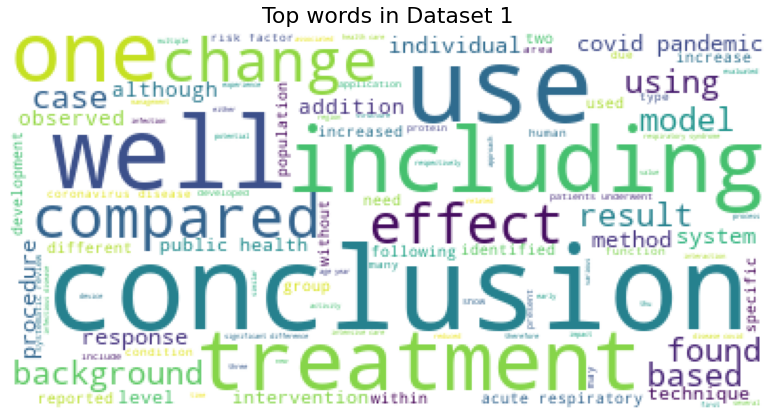

In [23]:
wc = WordCloud(
    background_color='white', 
    max_words=100, 
)
wc.generate(' '.join(text for text in dataset1['abstract']))
plt.figure(figsize=(14,7))
plt.title('Top words in Dataset 1', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [24]:
dataset1['abstract_len'].describe()

count    71050.000000
mean       134.617565
std         91.311812
min          1.000000
25%         93.000000
50%        134.000000
75%        171.000000
max      14570.000000
Name: abstract_len, dtype: float64

In [25]:
from plotly import graph_objs as go

In [26]:
data = pd.DataFrame(dataset1.abstract_len.value_counts().reset_index().values, columns=["abstract_len", "count"])
dataindex = data.sort_index(axis = 0, ascending=True)
dataindex

,abstract_len,count
0,168,573
1,159,543
2,167,530
3,165,524
4,160,522
...,...,...
519,453,1
520,619,1
521,477,1
522,428,1


In [47]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=dataindex['abstract_len'],
    y=dataindex['count'],
    # fill='tozeroy',
    marker_color='red',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Abstract Length Distribution (20-500)</span>',
)
fig.update_xaxes(range=[20, 500])
fig.show()

In [43]:
dataindex['abstract_len'].describe()

count      524.000000
mean       348.305344
std        801.677881
min          1.000000
25%        131.750000
50%        262.500000
75%        408.250000
max      14570.000000
Name: abstract_len, dtype: float64

In [46]:
dataindex.loc[dataindex['abstract_len'] == 452]

,abstract_len,count
384,452,2


In [ ]:
dataset1['abstract'] = dataset1['abstract'].str.replace(r' +', ' ')
dataset1['abstract'] = dataset1['abstract'].str.replace(' ', ',')
dataset1['abstract'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    objective,retrospective,chart,review,describes...
1    inflammatory,diseases,respiratory,tract,common...
2    surfactant,proteind,spd,participates,innate,re...
3    endothelin,et,amino,acid,peptide,diverse,biolo...
4    respiratory,syncytial,virus,rsv,pneumonia,viru...
Name: abstract, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
import math
from collections import defaultdict
import re

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
def wordLemmatizer(data):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    file_clean_k =pd.DataFrame()
    for index,entry in enumerate(data):
        
        # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
            # Below condition is to check for Stop words and consider only alphabets
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
            # The final processed set of words for each iteration will be stored in 'text_final'
                file_clean_k.loc[index,'Keyword_final'] = str(Final_words)
                file_clean_k.loc[index,'Keyword_final'] = str(Final_words)
                file_clean_k=file_clean_k.replace(to_replace ="\[.", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ="'", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace =" ", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ='\]', value = '', regex = True)
    return file_clean_k

In [ ]:
data1 = dataset1.head(14000)

In [ ]:
data1.abstract[0]

'objective,retrospective,chart,review,describes,epidemiology,clinical,features,patients,cultureproven,mycoplasma,pneumoniae,infections,king,abdulaziz,university,hospital,jeddah,saudi,arabia,methods,patients,positive,pneumoniae,cultures,respiratory,specimens,january,december,identified,microbiology,records,charts,patients,reviewed,results,patients,identified,required,admission,infections,communityacquired,infection,affected,age,groups,common,infants,preschool,children,occurred,yearround,common,fall,spring,threequarters,patients,comorbidities,twentyfour,isolates,associated,pneumonia,upper,respiratory,tract,infections,bronchiolitis,cough,fever,malaise,common,symptoms,crepitations,wheezes,common,signs,patients,pneumonia,crepitations,bronchial,breathing,immunocompromised,patients,likely,nonimmunocompromised,patients,present,pneumonia,versus,p,patients,pneumonia,uneventful,recovery,recovered,following,complications,died,pneumoniae,infection,died,due,underlying,comorbidities,patients,died,pne

**TF-IDF**

In [ ]:
# Membuat vocabulary
vocabulary = set()
for doc in data1.abstract:
    vocabulary.update(doc.split(','))
vocabulary = list(vocabulary)

# Menentukan model TF-IDF yang digunakan (Natural-TFIDF {NT})
tfidf = TfidfVectorizer(vocabulary=vocabulary)

# Fit the TF-IDF model
tfidf.fit(data1.abstract)

# Transform the TF-IDF model
tfidf_tran=tfidf.transform(data1.abstract)

**Create a vector for Query/search keywords**

In [ ]:
def gen_vector_T(tokens):
    Q = np.zeros((len(vocabulary)))    
    x= tfidf.transform(tokens)
    print(tokens[0].split(','))
    for token in tokens[0].split(','):
        print(token)
        try:
            ind = vocabulary.index(token)
            Q[ind]  = x[0, tfidf.vocabulary_[token]]
        except:
            pass
    return Q

**Cosine Similarity function for the calculation**

In [ ]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

Cosine Similarity document to query function

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
def cosine_similarity_T(k, query):
    preprocessed_query = preprocessed_query = re.sub("\W+", " ", query).strip()
    tokens = word_tokenize(str(preprocessed_query))
    q_df = pd.DataFrame(columns=['q_clean'])
    q_df.loc[0,'q_clean'] =tokens
    q_df['q_clean'] =wordLemmatizer(q_df.q_clean)
    d_cosines = []
    
    query_vector = gen_vector_T(q_df['q_clean'])
    for d in tfidf_tran.A:
        d_cosines.append(cosine_sim(query_vector, d))
                    
    out = np.array(d_cosines).argsort()[-k:][::-1]
    #print("")
    d_cosines.sort()
    a = pd.DataFrame()
    for i,index in enumerate(out):
        a.loc[i,'index'] = str(index)
        a.loc[i,'Title'] = data1['title'][index]
    for j,simScore in enumerate(d_cosines[-k:][::-1]):
        a.loc[j,'Score'] = simScore
    return a

In [ ]:
cosine_similarity_T(10,'development of antibody')

['development', 'antibody']
development
antibody


,index,Title,Score
0,8117,Antibody-Mediated Destruction of Virus-Infecte...,0.381294
1,75,Neutralizing Antibody Fails to Impact the Cour...,0.371866
2,6551,Prevention of Human Rotavirus-Induced Diarrhea...,0.338900
3,7870,Studies of an outbreak of acute hepatitis A: I...,0.310837
4,11999,Recombinant IgA Antibodies,0.310685
5,8340,Return to the Past: The Case for Antibody-Base...,0.305474
6,7328,Bovine monoclonal antibody specific for Brucel...,0.305320
7,4776,"Complement, viruses, and virus-infected cells",0.305119
8,2133,Monoclonal antibodies — a proven and rapidly e...,0.304980
9,2532,Antibody Engineering for Pursuing a Healthier ...,0.295459


In [ ]:
cosine_similarity_T(10,'global health')

['global', 'health']
global
health


,index,Title,Score
0,10436,Global health education in medical schools (GH...,0.593246
1,13919,From “Health for All” to “Health as Investment...,0.544275
2,12853,The Process and Practice of Negotiation,0.472500
3,2904,Politics of Ebola and the critical role of glo...,0.445343
4,12723,Current and Future Issues in Global Health Dip...,0.438224
5,13183,Global Health Security and Weapons of Mass Des...,0.437002
6,12061,Advocating Global Health Security,0.414461
7,11305,Global Health Security Innovation,0.410492
8,4813,In Search of Global Health Justice: A Need to ...,0.381515
9,13639,A Global Ethical Framework for Public Health D...,0.364292


In [ ]:
cosine_similarity_T(10,'public health awareness')

['public', 'health', 'awareness']
public
health
awareness


,index,Title,Score
0,6653,The impact of awareness on epidemic spreading ...,0.613087
1,5723,Virtue ethics and public health: A practice-ba...,0.526966
2,226,A multidimensional classification of public he...,0.412091
3,6268,And Why So Great a “No?”: The Donor and Academ...,0.361476
4,12394,Health Information in the Background: Justifyi...,0.357346
5,5730,The Political Face of Public Health,0.335519
6,12181,Population and Public Health,0.334724
7,12765,Modeling the Spread of Preventable Diseases: S...,0.333389
8,6651,The impact of vaccine success and awareness on...,0.328224
9,13950,Biosurveillance and Dentistry,0.325084
